In [ ]:
pip install imutils

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score

import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Conv2D # la función Conv2D que sirve para crear cada una de las capas de convolución intermedias (ocultas) de las RNC
from keras.layers import MaxPool2D # la función MaxPool2D que sirve para crear cada una de las capas de max-pooling de las RNC
from keras.layers import Flatten # la función Flatten que sirve para crear la capa de flattening de las RNC
from keras.layers import Dense, Dropout

In [ ]:
#'C:\\Users\\Administrador.CRISASUSESTUDIO\\Desktop\\InteligenciaArtificial\\dataset_animal'
#C:\Users\Administrador.CRISASUSESTUDIO\Desktop\InteligenciaArtificial\dataset_animal
dataset_path = '/content/drive/MyDrive/Colab Notebooks/dataset_animal'

""""
CONSIDERACIONES:

-batch_size: un tamaño del lote, preferiblemente no muy grande para evitar colapsar.

-class_mode='binary' para clasificación binaria.
-Para más de dos clases,  class_mode='categorical'.

-El primer parámetro es el directorio. Para training y val, es el mismo directorio. Para test, la carpeta de test_set.

-subset: ahí ponemos para qué sirve ese lote (training o validation). Test no tiene subset.

-target_size: tamaño de las imágenes. Ahí tenemos que jugar con el tamño de las imágenes.

"""


# Crear un generador para el conjunto de entrenamiento y validación
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Generador para el conjunto de entrenamiento
train_set = train_datagen.flow_from_directory(
    f'{dataset_path}/training_set/',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

# Generador para el conjunto de validación
val_set = train_datagen.flow_from_directory(
    f'{dataset_path}/training_set/',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Generador para el conjunto de test
test_datagen = ImageDataGenerator(rescale=1./255)

test_set = test_datagen.flow_from_directory(
     f'{dataset_path}/test_set/',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 4172 images belonging to 2 classes.
Found 1072 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


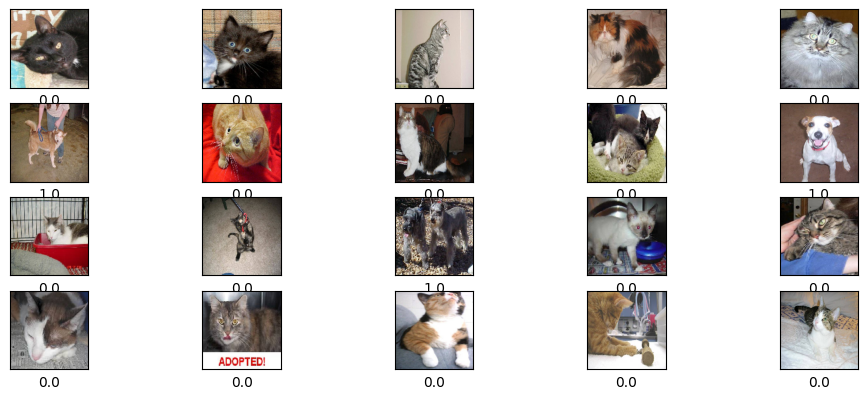

In [ ]:

# Obtener un lote de imágenes y etiquetas del generador de entrenamiento
images, labels = next(train_set)

plt.figure(figsize=(12,12))
for i in range(20):
    plt.subplot(10,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[i], cmap=plt.cm.binary)
    plt.xlabel(labels[i])
plt.show()

** Opción 2: utilizamos el modelo preentrenado de VGG16 u otro modelo preentrenado	**

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense


# Cargamos el modelo base
base_model = VGG16(
     weights="imagenet",
     include_top=False,
     input_shape=[150, 150, 3]
)


#TODO Ahora que tneemos el modelo VGG16, vamos a añadir nuestras capas densas
x = base_model.output
x = Flatten()(x)  # Aplanamos la salida del modelo base
x = Dense(1, activation='sigmoid')(x)  # Añadimos una capa densa con una activación sigmoide

model = Model(inputs=base_model.input, outputs=x)

model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=1e-4),
    metrics=['accuracy']
)
model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │           8,193 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 14,722,881 (56.16 MB)

 Trainable params: 14,722,881 (56.16 MB)

 Non-trainable params: 0 (0.00 B)

### Entrenamos el modelo

In [ ]:
EPOCHS = 5
es = EarlyStopping(
    monitor='accuracy',
    mode='max',
    patience=6
)

# Número total de imágenes en el conjunto de entrenamiento
num_train_images = train_set.n

# Número total de imágenes en el conjunto de validación
num_val_images = val_set.n

history = model.fit(
    train_set,
    steps_per_epoch=num_train_images // train_set.batch_size,
    epochs=EPOCHS,
    validation_data=val_set,
    validation_steps=num_val_images // val_set.batch_size,
    callbacks=[es]
)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


130/130 ━━━━━━━━━━━━━━━━━━━━ 4660s 35s/step - accuracy: 0.7896 - loss: 0.4660 - val_accuracy: 0.8665 - val_loss: 0.3584
Epoch 2/5
  1/130 ━━━━━━━━━━━━━━━━━━━━ 1:03:54 30s/step - accuracy: 0.8750 - loss: 0.3907

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


130/130 ━━━━━━━━━━━━━━━━━━━━ 35s 42ms/step - accuracy: 0.8750 - loss: 0.3907 - val_accuracy: 1.0000 - val_loss: 0.0087
Epoch 3/5
130/130 ━━━━━━━━━━━━━━━━━━━━ 4292s 33s/step - accuracy: 0.9126 - loss: 0.1975 - val_accuracy: 0.9384 - val_loss: 0.1418
Epoch 4/5
130/130 ━━━━━━━━━━━━━━━━━━━━ 35s 28ms/step - accuracy: 0.9062 - loss: 0.1292 - val_accuracy: 1.0000 - val_loss: 0.0202
Epoch 5/5
130/130 ━━━━━━━━━━━━━━━━━━━━ 4261s 33s/step - accuracy: 0.9582 - loss: 0.1080 - val_accuracy: 0.9195 - val_loss: 0.1882
